## Group 8 - HR Analytics: Job Change of Data Scientists 

### Importing Necessary libraries

In [21]:
##Importing Libraries

%matplotlib inline 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
mpl.style.use('ggplot')

The dataset is contatining details about the people who signedup for data science training courses with the company and wants to work for the company after training or looking for a new employment. The file <b>aug_train.csv</b> is our training dataset which contains 19K records of people who signed up for training and might be looking for a employment change

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
|enrollee_id|Unique ID for candidate|
|city|City code|
|city_development_index|Developement index of the city (scaled)|
|gender|Gender of candidate|
|relevent_experience|Relevant experience of candidate|
|enrolled_university|Type of University course enrolled if any|
|education_level|Education level of candidate|
|major_discipline|Education major discipline of candidate|
|experience|Candidate total experience in years|
|company_size|No of employees in current employer's company|
|company_type|Type of current employer|
|lastnewjob|Difference in years between previous job and current job|
|training_hours|training hours completed|
|target|0 – Not looking for job change, 1 – Looking for a job change|

### Importing Training and Testing Datasets from csv

In [22]:
##Importing dataset and defining test and training datasets

dataset_test = pd.read_csv('aug_test.csv')
dataset_train = pd.read_csv('aug_train.csv')
dataset_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [23]:
dataset_train.shape

(19158, 14)

### Preprocessing of Data

In [24]:
##Data Preprocessing for training data

print(dataset_train.dtypes)

dataset_train['city'] = dataset_train['city'].map(lambda x: x.lstrip('city_'))
dataset_train.experience = dataset_train.experience.astype(str)
dataset_train['experience'] = dataset_train['experience'].map(lambda x: x.lstrip('<'))
dataset_train['experience'] = dataset_train['experience'].map(lambda x: x.lstrip('>'))
dataset_train.loc[( dataset_train.experience == 'nan'),'experience'] = 0
dataset_train.experience=dataset_train.experience.astype(int)
dataset_train.last_new_job = dataset_train.last_new_job.astype(str)
dataset_train['last_new_job'] = dataset_train['last_new_job'].map(lambda x: x.lstrip('>'))
dataset_train['last_new_job'] = dataset_train['last_new_job'].map(lambda x: x.lstrip('<'))
dataset_train.loc[( dataset_train.last_new_job == 'never'),'last_new_job'] = 0
dataset_train.loc[( dataset_train.last_new_job == 'nan'),'last_new_job'] = 0

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


### Exploratory Data Analysis for Data Engineering Rules Definition

[1136 2481 2833 2244 1782 1649  893 1272  850 4018]
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


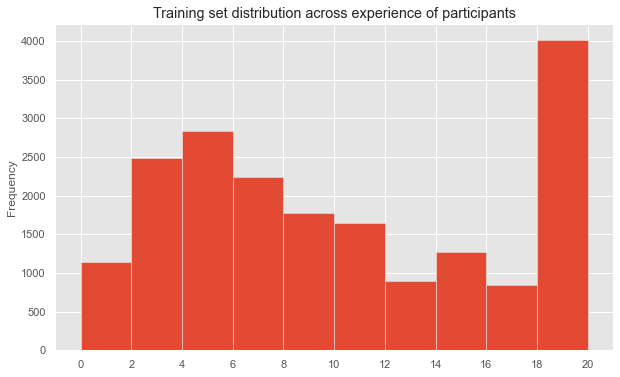

In [25]:
count_ex, bin_edges_ex = np.histogram(dataset_train['experience'])
print(count_ex) # frequency count
print(bin_edges_ex) # bin ranges, default = 10 bins

dataset_train['experience'].plot(kind='hist',figsize=(10,6),xticks=bin_edges_ex,alpha=1,title = "Training set distribution across experience of participants")

[7262 5169 2897 1564 1066  398  314  166  133  189]
[  1.   34.5  68.  101.5 135.  168.5 202.  235.5 269.  302.5 336. ]


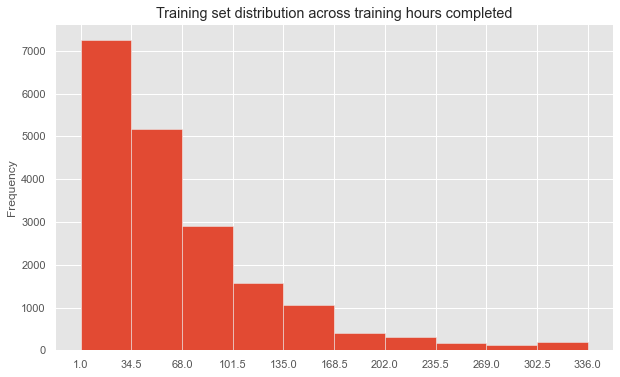

In [26]:
count, bin_edges = np.histogram(dataset_train['training_hours'])
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins
dataset_train['training_hours'].plot(kind='hist',figsize=(10,6),xticks=bin_edges,alpha=1,title = "Training set distribution across training hours completed")

experience  target
0           0.0       0.646154
            1.0       0.353846
1           0.0       0.561158
            1.0       0.438842
2           0.0       0.668146
            1.0       0.331854
3           0.0       0.646972
            1.0       0.353028
4           0.0       0.674269
            1.0       0.325731
5           0.0       0.711888
            1.0       0.288112
6           0.0       0.717928
            1.0       0.282072
7           0.0       0.705253
            1.0       0.294747
8           0.0       0.756858
            1.0       0.243142
9           0.0       0.782653
            1.0       0.217347
10          0.0       0.789848
            1.0       0.210152
11          0.0       0.772590
            1.0       0.227410
12          0.0       0.813765
            1.0       0.186235
13          0.0       0.807018
            1.0       0.192982
14          0.0       0.817406
            1.0       0.182594
15          0.0       0.833819
            1.0     

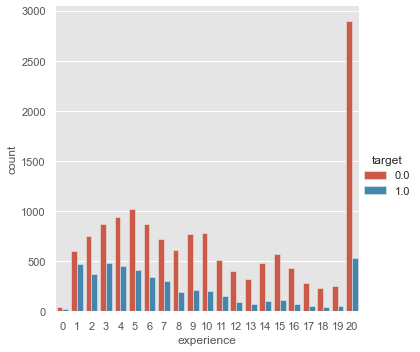

In [27]:
dataset_train.sort_values(['experience'], axis=0,inplace=True)
sns.catplot(x='experience',kind="count",hue='target',data=dataset_train)
dataset_train.groupby(['experience'])['target'].value_counts(normalize='true')

As evident from the graph and distribution, 84% of the participants with 20 or more years of experience were not targeted

education_level  target
Graduate         0.0       0.720210
                 1.0       0.279790
High School      0.0       0.804660
                 1.0       0.195340
Masters          0.0       0.785600
                 1.0       0.214400
Phd              0.0       0.859903
                 1.0       0.140097
Primary School   0.0       0.866883
                 1.0       0.133117
Name: target, dtype: float64

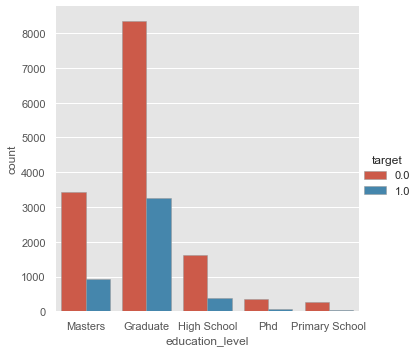

In [28]:
sns.catplot(x='education_level',kind="count",hue='target',data=dataset_train,edgecolor=".6")
dataset_train.groupby(['education_level'])['target'].value_counts(normalize='true')

As seen from the distribution, people having Primary School education were not targeted much

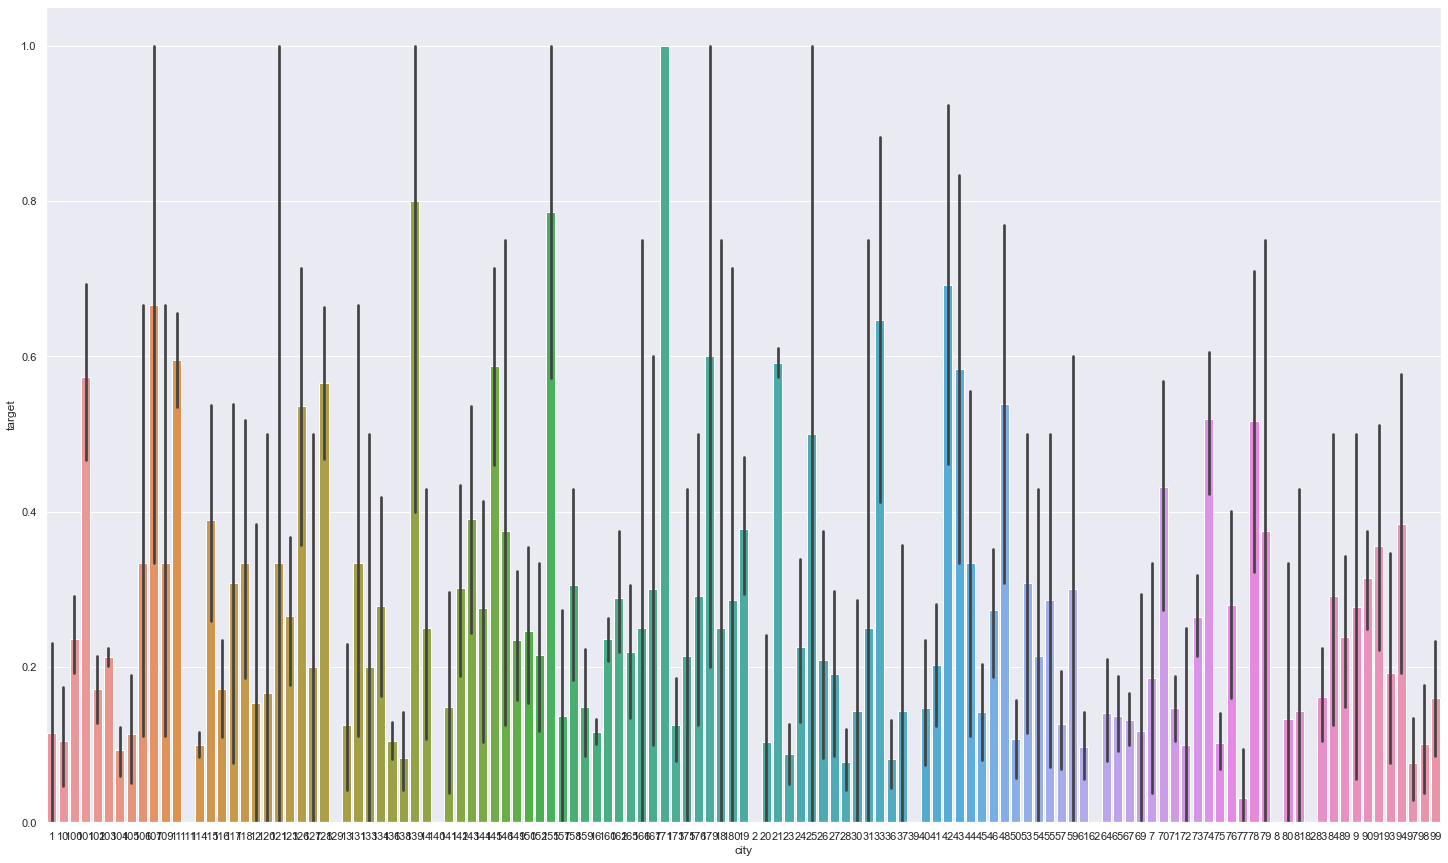

In [29]:
sns.set(rc={'figure.figsize':(25,15)})
sns.barplot(x='city',y="target",data=dataset_train)

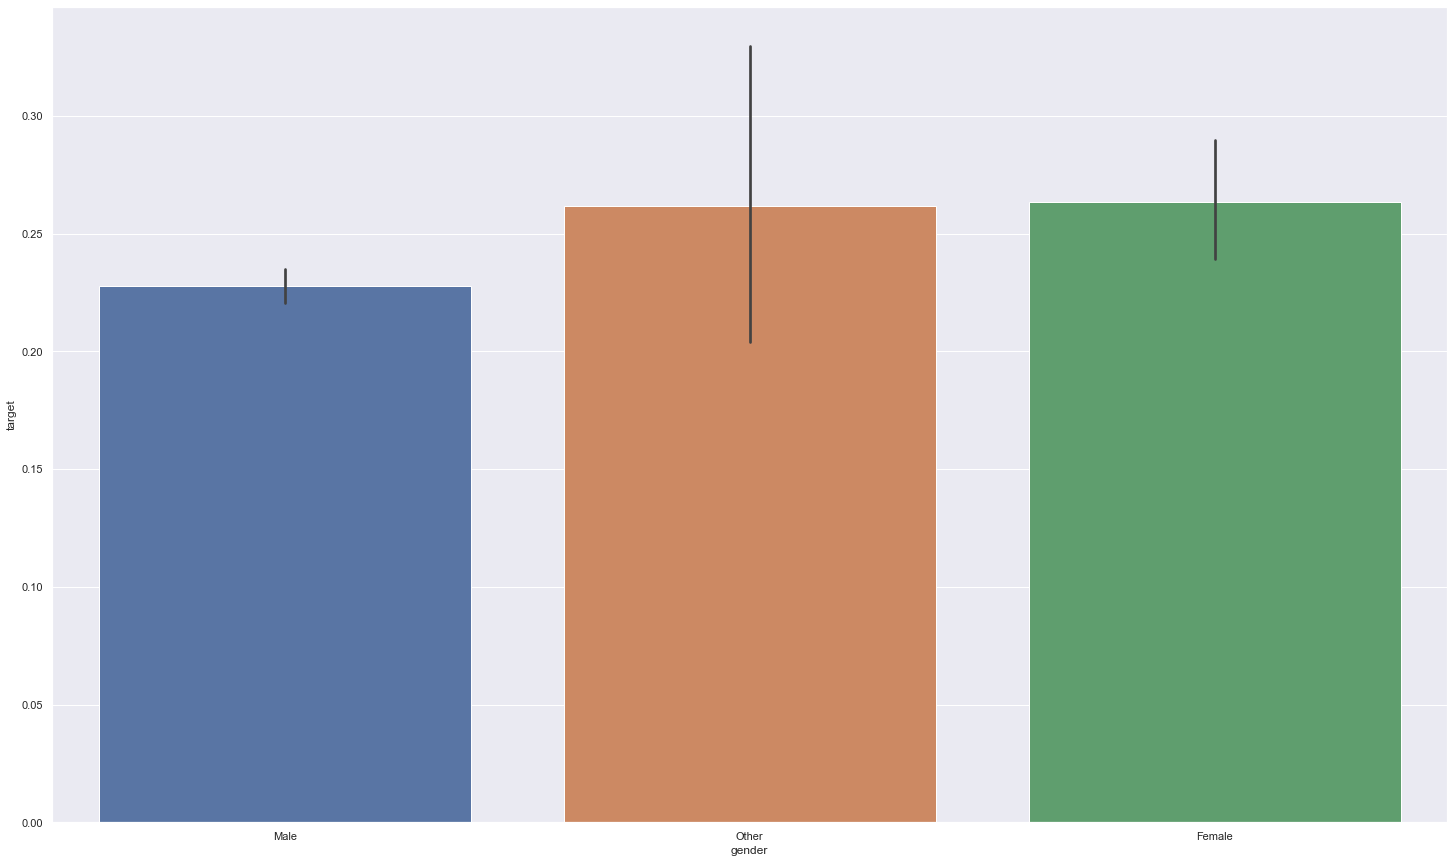

In [30]:
sns.barplot(x='gender',y='target', data=dataset_train)

Data distributions of columns like Gender, Education level, Company Type, Company Size, Major Discipline and city Development Index won't effect the outcome of the liekliness of the participant to switch the job and thus can be dropped

### Preparation of Training Dataset and Feature Selection

In [31]:
## Rule 1 : People having experience more than 20 years are not in target audience
dataset_train.loc[(dataset_train.experience == '20'),'target'] = 0

##Rule 2: People having only primary school level education are not in target audience
dataset_train.loc[(dataset_train.education_level == 'Primary School'),'target'] = 0

##dataset_train
##dataset_train.to_excel(r'C:\Users\91741\OneDrive - purdue.edu\Desktop\Rule2_Ver2.xlsx', index = False)


print(dataset_train['last_new_job'])

##dataset_train.gender = dataset_train.gender.astype('str')
##dataset_train.education_level = dataset_train.education_level.astype('str')

dataset_train = dataset_train.drop(['gender', 'education_level', 'enrolled_university' , 'relevent_experience', 'company_type' , 'company_size' , 'major_discipline' , 'city_development_index'],axis=1)
    
print(dataset_train.dtypes)
##dataset_train.to_excel (r'C:\Users\91741\OneDrive - purdue.edu\Desktop\export_dataframe_3.xlsx', index = False, header=True)

6334     2
17677    2
14708    1
16067    1
4336     0
        ..
4346     4
9005     2
9008     1
4369     4
0        1
Name: last_new_job, Length: 19158, dtype: object
enrollee_id         int64
city               object
experience          int32
last_new_job       object
training_hours      int64
target            float64
dtype: object


C:\Users\91741\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


### Data Preprocessing and Feature Selection for Test Data

In [32]:
##Data Preprocessing for test data

dataset_test['city'] = dataset_test['city'].map(lambda x: x.lstrip('city_'))
dataset_test.experience = dataset_test.experience.astype(str)
dataset_test['experience'] = dataset_test['experience'].map(lambda x: x.lstrip('<'))
dataset_test['experience'] = dataset_test['experience'].map(lambda x: x.lstrip('>'))
dataset_test.loc[( dataset_test.experience == 'nan'),'experience'] = 0
dataset_test.last_new_job = dataset_test.last_new_job.astype(str)
dataset_test['last_new_job'] = dataset_test['last_new_job'].map(lambda x: x.lstrip('>'))
dataset_test['last_new_job'] = dataset_test['last_new_job'].map(lambda x: x.lstrip('<'))
dataset_test.loc[( dataset_test.last_new_job == 'never'),'last_new_job'] = 0
dataset_test.loc[( dataset_test.last_new_job == 'nan'),'last_new_job'] = 0

print(dataset_test['last_new_job'])

dataset_test = dataset_test.drop(['gender', 'education_level', 'enrolled_university' , 'relevent_experience', 'company_type' , 'company_size' , 'major_discipline' , 'city_development_index'],axis=1)


##x = dataset_train.iloc[:, :-1].values
##y = dataset_train.iloc[-1].values

x = dataset_train.iloc[:, :-1].values
y = dataset_train.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#y_test = dataset_test.iloc[:, -1].values

0       1
1       1
2       0
3       1
4       4
       ..
2124    4
2125    2
2126    0
2127    1
2128    2
Name: last_new_job, Length: 2129, dtype: object


### Feature Scaling

In [33]:
##Since no categorical encoding done, feature scaling to be applied on all features of the model

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)


### Application of Prediction Models

#### 1. Linear Regression

In [34]:
##Logistic regression for Yes/no prediction
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
y_pred = logistic.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      3632
         1.0       0.00      0.00      0.00      1158

    accuracy                           0.76      4790
   macro avg       0.38      0.50      0.43      4790
weighted avg       0.57      0.76      0.65      4790



C:\Users\91741\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 2. Decision Tree

In [35]:
##Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78      3632
         1.0       0.33      0.37      0.35      1158

    accuracy                           0.67      4790
   macro avg       0.56      0.56      0.56      4790
weighted avg       0.68      0.67      0.67      4790



#### 3. K Nearest Neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.precision_score(y_test, yhat,average='weighted')    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    print("For K=",n)
    print(classification_report(y_test, yhat))

print(mean_acc)
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

For K= 1
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      3632
         1.0       0.29      0.29      0.29      1158

    accuracy                           0.66      4790
   macro avg       0.53      0.53      0.53      4790
weighted avg       0.66      0.66      0.66      4790

For K= 2
              precision    recall  f1-score   support

         0.0       0.77      0.94      0.84      3632
         1.0       0.35      0.11      0.16      1158

    accuracy                           0.74      4790
   macro avg       0.56      0.52      0.50      4790
weighted avg       0.67      0.74      0.68      4790

For K= 3
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81      3632
         1.0       0.34      0.24      0.28      1158

    accuracy                           0.70      4790
   macro avg       0.56      0.55      0.55      4790
weighted avg       0.67      0.70      0.68    

#### 4. Random Forest


In [37]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
y_pred_random = forest.predict(x_test)
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      3632
         1.0       0.54      0.28      0.37      1158

    accuracy                           0.77      4790
   macro avg       0.67      0.60      0.61      4790
weighted avg       0.74      0.77      0.74      4790



#### 5. SVM - Support Vector Machines

In [38]:
##SVM Classifier
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      3632
         1.0       0.54      0.28      0.37      1158

    accuracy                           0.77      4790
   macro avg       0.67      0.60      0.61      4790
weighted avg       0.74      0.77      0.74      4790



### Applying Random Forest Model on the Test Data to predict target audience for Test Data

In [39]:
##Running Test Data on Random Forest Model

##dataset_test.to_excel (r'C:\Users\91741\OneDrive - purdue.edu\Desktop\export_testdata.xlsx', index = False, header=True)

dataset_test['Target'] = forest.predict(dataset_test)
dataset_test

,enrollee_id,city,experience,last_new_job,training_hours,Target
0,32403,41,9,1,21,0.0
1,9858,103,5,1,98,0.0
2,31806,21,1,0,15,0.0
3,27385,13,11,1,39,0.0
4,27724,103,20,4,72,1.0
...,...,...,...,...,...,...
2124,1289,103,16,4,15,1.0
2125,195,136,18,2,30,1.0
2126,31762,100,3,0,18,0.0
2127,7873,102,7,1,84,0.0
